In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import mean_squared_error, structural_similarity
import copy

image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

Text(0.5, 1.0, 'Изображение + гауссов шум')

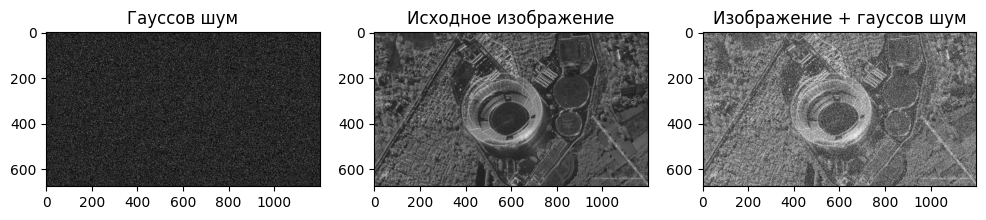

In [23]:
mean = 0
stddev = 100
noise_gauss = np.zeros(image_gray.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)

plt.figure(figsize=(12, 5))
plt.subplot(1,3,1)
plt.imshow(noise_gauss, cmap='gray')
plt.title('Гауссов шум')

image_noise_gauss = cv2.add(image_gray, noise_gauss)

plt.subplot(1,3,2)
plt.imshow(image_gray, cmap='gray')
plt.title('Исходное изображение')

plt.subplot(1,3,3)
plt.imshow(image_noise_gauss, cmap='gray')
plt.title('Изображение + гауссов шум')

Text(0.5, 1.0, 'Изображение + импульсный шум')

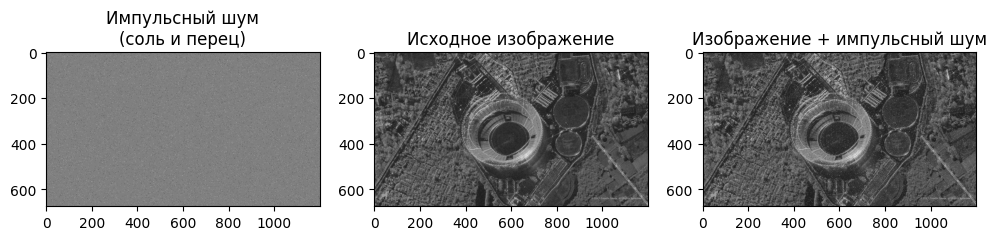

In [26]:
noise = np.random.randint(0, 101, size=(image_gray.shape[0], image_gray.shape[1]), dtype=int)
zeros_pixel = np.where(noise == 0)
ones_pixel = np.where(noise == 100)

noise_texture = np.ones(image_gray.shape, np.uint8) * 128
noise_texture[zeros_pixel] = 0
noise_texture[ones_pixel] = 255

plt.figure(figsize=(12, 5))
plt.subplot(1,3,1)
plt.imshow(noise_texture, cmap='gray')
plt.title('Импульсный шум\n(соль и перец)')

image_sp = copy.deepcopy(image_gray)
image_sp[zeros_pixel] = 0
image_sp[ones_pixel] = 255

plt.subplot(1,3,2)
plt.imshow(image_gray, cmap='gray')
plt.title('Исходное изображение')

plt.subplot(1,3,3)
plt.imshow(image_sp, cmap='gray')
plt.title('Изображение + импульсный шум')

In [29]:
print("Фильтрация гауссова шума.")

image_gauss_median = cv2.medianBlur(image_noise_gauss, 3)
mse_gauss_median = mean_squared_error(image_gray, image_gauss_median)
ssim_gauss_median, _ = structural_similarity(image_gray, image_gauss_median, full=True)
print(f"Медианный фильтр - MSE: {mse_gauss_median:.2f}, SSIM: {ssim_gauss_median:.4f}.")

image_gauss_gauss = cv2.GaussianBlur(image_noise_gauss, (5,5), 0)
mse_gauss_gauss = mean_squared_error(image_gray, image_gauss_gauss)
ssim_gauss_gauss, _ = structural_similarity(image_gray, image_gauss_gauss, full=True)
print(f"Фильтр Гаусса - MSE: {mse_gauss_gauss:.2f}, SSIM: {ssim_gauss_gauss:.4f}.")

image_gauss_bilateral = cv2.bilateralFilter(image_noise_gauss, 9, 75, 75)
mse_gauss_bilateral = mean_squared_error(image_gray, image_gauss_bilateral)
ssim_gauss_bilateral, _ = structural_similarity(image_gray, image_gauss_bilateral, full=True)
print(f"Билатеральный фильтр - MSE: {mse_gauss_bilateral:.2f}, SSIM: {ssim_gauss_bilateral:.4f}.")

Фильтрация гауссова шума.
Медианный фильтр - MSE: 1028.86, SSIM: 0.4300.
Фильтр Гаусса - MSE: 1755.68, SSIM: 0.4877.
Билатеральный фильтр - MSE: 1831.13, SSIM: 0.3153.


In [31]:
print("Фильтрация импульсного шума.")

image_sp_median = cv2.medianBlur(image_sp, 3)
mse_sp_median = mean_squared_error(image_gray, image_sp_median)
ssim_sp_median, _ = structural_similarity(image_gray, image_sp_median, full=True)
print(f"Медианный фильтр - MSE: {mse_sp_median:.2f}, SSIM: {ssim_sp_median:.4f}.")

image_sp_gauss = cv2.GaussianBlur(image_sp, (5,5), 0)
mse_sp_gauss = mean_squared_error(image_gray, image_sp_gauss)
ssim_sp_gauss, _ = structural_similarity(image_gray, image_sp_gauss, full=True)
print(f"Фильтр Гаусса - MSE: {mse_sp_gauss:.2f}, SSIM: {ssim_sp_gauss:.4f}.")

image_sp_bilateral = cv2.bilateralFilter(image_sp, 9, 75, 75)
mse_sp_bilateral = mean_squared_error(image_gray, image_sp_bilateral)
ssim_sp_bilateral, _ = structural_similarity(image_gray, image_sp_bilateral, full=True)
print(f"Билатеральный фильтр - MSE: {mse_sp_bilateral:.2f}, SSIM: {ssim_sp_bilateral:.4f}.")

Фильтрация импульсного шума.
Медианный фильтр - MSE: 95.56, SSIM: 0.8165.
Фильтр Гаусса - MSE: 143.17, SSIM: 0.7345.
Билатеральный фильтр - MSE: 267.16, SSIM: 0.5188.


In [35]:
print("Для гауссова шума:")
gauss_filters = {
    'Медианный': mse_gauss_median,
    'Гаусса': mse_gauss_gauss,
    'Билатеральный': mse_gauss_bilateral
}
for filter_name, mse_value in gauss_filters.items():
    print(f"{filter_name} фильтр - MSE: {mse_value:.2f}")
best_gauss = min(gauss_filters, key=gauss_filters.get)
print(f"Лучший результат для гауссова шума: {best_gauss} фильтр (MSE: {gauss_filters[best_gauss]:.2f})")
print("Для импульсного шума:")
sp_filters = {
    'Медианный': mse_sp_median,
    'Гаусса': mse_sp_gauss,
    'Билатеральный': mse_sp_bilateral
}
for filter_name, mse_value in sp_filters.items():
    print(f"{filter_name} фильтр - MSE: {mse_value:.2f}")
best_sp = min(sp_filters, key=sp_filters.get)
print(f"Лучший результат для импульсного шума: {best_sp} фильтр (MSE: {sp_filters[best_sp]:.2f})")

Для гауссова шума:
Медианный фильтр - MSE: 1028.86
Гаусса фильтр - MSE: 1755.68
Билатеральный фильтр - MSE: 1831.13
Лучший результат для гауссова шума: Медианный фильтр (MSE: 1028.86)
Для импульсного шума:
Медианный фильтр - MSE: 95.56
Гаусса фильтр - MSE: 143.17
Билатеральный фильтр - MSE: 267.16
Лучший результат для импульсного шума: Медианный фильтр (MSE: 95.56)


h=20 - MSE: 4217.53, SSIM: 0.1879.
h=120 - MSE: 1900.54, SSIM: 0.2592.
h=2 - MSE: 4221.86, SSIM: 0.1875.


Text(0.5, 1.0, 'NLM h=2\nMSE: 4221.9')

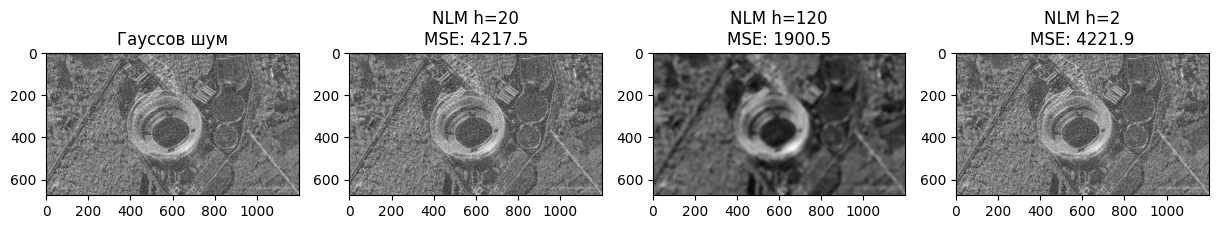

In [42]:
image_gauss_nlm_1 = cv2.fastNlMeansDenoising(image_noise_gauss, h=20)
image_gauss_nlm_2 = cv2.fastNlMeansDenoising(image_noise_gauss, h=120)
image_gauss_nlm_3 = cv2.fastNlMeansDenoising(image_noise_gauss, h=2)

mse_nlm_1 = mean_squared_error(image_gray, image_gauss_nlm_1)
ssim_nlm_1, _ = structural_similarity(image_gray, image_gauss_nlm_1, full=True)

mse_nlm_2 = mean_squared_error(image_gray, image_gauss_nlm_2)
ssim_nlm_2, _ = structural_similarity(image_gray, image_gauss_nlm_2, full=True)

mse_nlm_3 = mean_squared_error(image_gray, image_gauss_nlm_3)
ssim_nlm_3, _ = structural_similarity(image_gray, image_gauss_nlm_3, full=True)

print(f"h=20 - MSE: {mse_nlm_1:.2f}, SSIM: {ssim_nlm_1:.4f}.")
print(f"h=120 - MSE: {mse_nlm_2:.2f}, SSIM: {ssim_nlm_2:.4f}.")
print(f"h=2 - MSE: {mse_nlm_3:.2f}, SSIM: {ssim_nlm_3:.4f}.")

plt.figure(figsize=(15, 10))

plt.subplot(1,4,1)
plt.imshow(image_noise_gauss, cmap='gray')
plt.title('Гауссов шум')

plt.subplot(1,4,2)
plt.imshow(image_gauss_nlm_1, cmap='gray')
plt.title(f'NLM h=20\nMSE: {mse_nlm_1:.1f}')

plt.subplot(1,4,3)
plt.imshow(image_gauss_nlm_2, cmap='gray')
plt.title(f'NLM h=120\nMSE: {mse_nlm_2:.1f}')

plt.subplot(1,4,4)
plt.imshow(image_gauss_nlm_3, cmap='gray')
plt.title(f'NLM h=2\nMSE: {mse_nlm_3:.1f}')

Постоянный шум - MSE: 839.08, SSIM: 0.4116


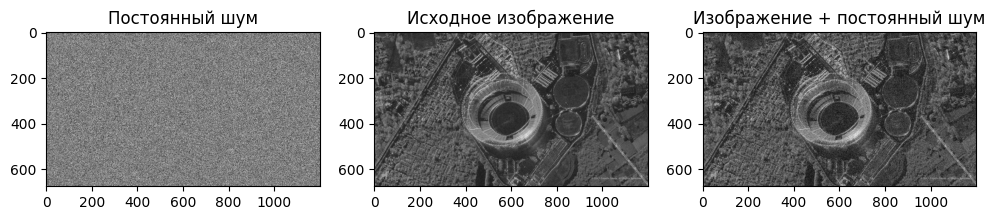

In [41]:
uniform_noise = np.random.randint(-50, 51, size=image_gray.shape, dtype=np.int16)

noise_texture_uniform = ((uniform_noise - uniform_noise.min()) / 
                        (uniform_noise.max() - uniform_noise.min()) * 255).astype(np.uint8)

plt.figure(figsize=(12, 5))
plt.subplot(1,3,1)
plt.imshow(noise_texture_uniform, cmap='gray')
plt.title('Постоянный шум')

image_uniform = image_gray.astype(np.int16) + uniform_noise
image_uniform = np.clip(image_uniform, 0, 255).astype(np.uint8)

plt.subplot(1,3,2)
plt.imshow(image_gray, cmap='gray')
plt.title('Исходное изображение')

plt.subplot(1,3,3)
plt.imshow(image_uniform, cmap='gray')
plt.title('Изображение + постоянный шум')

mse_uniform = mean_squared_error(image_gray, image_uniform)
ssim_uniform, _ = structural_similarity(image_gray, image_uniform, full=True)
print(f"Постоянный шум - MSE: {mse_uniform:.2f}, SSIM: {ssim_uniform:.4f}")

In [43]:
image_uniform_median = cv2.medianBlur(image_uniform, 3)
mse_uniform_median = mean_squared_error(image_gray, image_uniform_median)
ssim_uniform_median, _ = structural_similarity(image_gray, image_uniform_median, full=True)
print(f"Медианный фильтр - MSE: {mse_uniform_median:.2f}, SSIM: {ssim_uniform_median:.4f}")

image_uniform_gauss = cv2.GaussianBlur(image_uniform, (5,5), 0)
mse_uniform_gauss = mean_squared_error(image_gray, image_uniform_gauss)
ssim_uniform_gauss, _ = structural_similarity(image_gray, image_uniform_gauss, full=True)
print(f"Фильтр Гаусса - MSE: {mse_uniform_gauss:.2f}, SSIM: {ssim_uniform_gauss:.4f}")

image_uniform_bilateral = cv2.bilateralFilter(image_uniform, 9, 75, 75)
mse_uniform_bilateral = mean_squared_error(image_gray, image_uniform_bilateral)
ssim_uniform_bilateral, _ = structural_similarity(image_gray, image_uniform_bilateral, full=True)
print(f"Билатеральный фильтр - MSE: {mse_uniform_bilateral:.2f}, SSIM: {ssim_uniform_bilateral:.4f}")

image_uniform_nlm = cv2.fastNlMeansDenoising(image_uniform, h=20)
mse_uniform_nlm = mean_squared_error(image_gray, image_uniform_nlm)
ssim_uniform_nlm, _ = structural_similarity(image_gray, image_uniform_nlm, full=True)
print(f"Нелокальные средние - MSE: {mse_uniform_nlm:.2f}, SSIM: {ssim_uniform_nlm:.4f}")

Медианный фильтр - MSE: 315.61, SSIM: 0.5386
Фильтр Гаусса - MSE: 173.38, SSIM: 0.6808
Билатеральный фильтр - MSE: 209.18, SSIM: 0.6094
Нелокальные средние - MSE: 296.60, SSIM: 0.6046
